**Ejercicio**
Se recolectaron datos relacionados con el contador de una particular grabadora con su  tiempo de uso. ¿Cómo podríamos construir un modelo empírico para predecir la cantidad de tiempo transcurrido de una grabadora como función de su contador de  lectura?.

|ci  |100  |200  |300  |400  |500 | 600 | 700 | 800|
|---|------|------|-----|----|----|----|-----|-----|
| ti |205  |430  |677  |  945|1233| 1542| 1872| 2224|


1. Construir un polinomio que pase por cada uno de los datos(polinomial simple o lagrange) (x: Contador de lectura)(y: Tiempo de uso).
2. Regresión por minimos cuadrados de los datos
3. Grafico de dispersión(x vs y d_obser), polinomio(simple o lagrange), regresion
4. Calcular el contador de lectura para un tiempo de uso de 2000 unidades de tiempo. P(x)=2000, donde x es el contador y P(x)= tiempo de uso. Usar un método de ceros de funciones.... Función P(x)-2000=0. (polinomio y con la regresión)
5.  Cuál de los dos modelos es el que mejor se adapta al comportamiento de los datos.

In [52]:
from Interpolacion_Ajuste.Lagrange.lagrange import lagrange
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp


x = sp.symbols('x')

x_data = np.array([100, 200, 300, 400, 500, 600, 700, 800])
y_data = np.array([205, 430, 677, 945, 1233, 1542, 1872, 2224])

coef = lagrange(x_data, y_data)
print(coef)

Polinomio = lagrange(x_data, y_data)
Polinomio1 = sp.lambdify(x, Polinomio)


x**7/50400000000000000 - x**6/16000000000000 + 577*x**5/7200000000000 - 257*x**4/4800000000 + 2849*x**3/144000000 - 349*x**2/120000 + 97823*x/42000 - 14


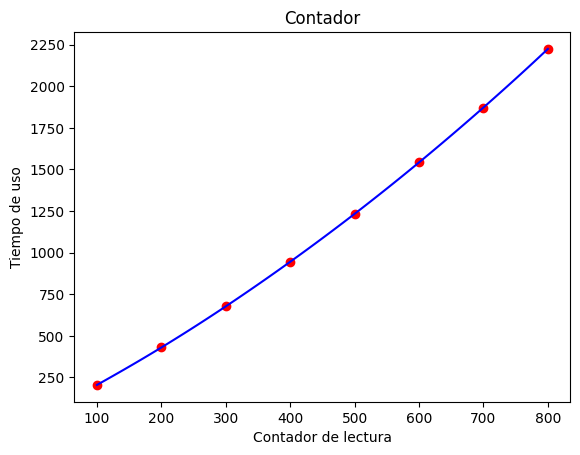

In [53]:
# Grafica

ux = np.linspace(min(x_data), max(x_data), 100)
plt.plot(x_data, y_data, 'or', label= 'Datos observados')
plt.plot(ux, Polinomio1(ux), 'b', label= 'Polinomio interpolante')
plt.xlabel('Contador de lectura')
plt.ylabel('Tiempo de uso')
plt.title('Contador')
plt.show()

 La pendiente es: 2.884047619047619, y el intervalo es -156.82142857142858


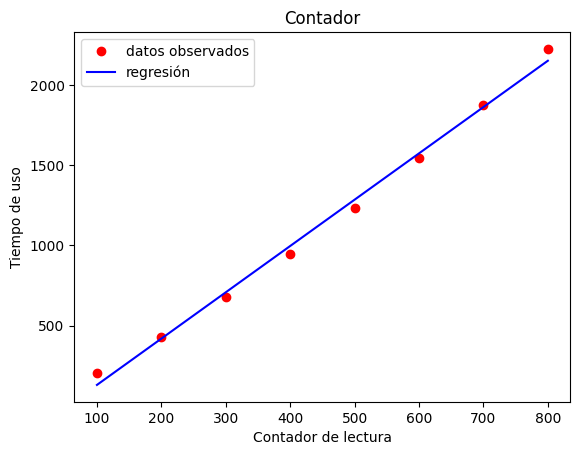

In [54]:
# regresión
from Interpolacion_Ajuste.MinimosCuadrados.minimos_cuadrados import minimos_cuadrados


m,b = minimos_cuadrados(x_data, y_data)
print(f" La pendiente es: {m}, y el intervalo es {b}")

# Gráfico de dispersión
P = lambda x: m * x + b

ux = np.linspace(min(x_data), max(x_data), 100)
plt.plot(x_data, y_data, 'or', label='datos observados')
plt.plot(ux,P(ux), 'b', label='regresión')
plt.xlabel('Contador de lectura')
plt.ylabel('Tiempo de uso')
plt.title('Contador')
plt.legend()
plt.show()

In [55]:
from CerosDeFunciones.MetodosAbiertos.Secante.secante import secante

# ceros

# Función de ceros para la regresión lineal
funcion1 = lambda x: P(x) - 2000
# Función de ceros para el polinomio de interpolación (Lagrange)
funcion2 = lambda x: Polinomio1(x) - 2000

X0 = 800
X1 = 1000
raiz_regresion, ite = secante(funcion1, X0, X1)
raiz_polinomio, iter = secante(funcion2, X0, X1)

print(f"Raíz (contador) con regresión: {raiz_regresion}, iteraciones: {ite}")
print(f"Raíz (contador) con polinomio: {raiz_polinomio}, iteraciones: {iter}")

Raíz (contador) con regresión: 747.8452901840997, iteraciones: 1
Raíz (contador) con polinomio: 737.1859053490997, iteraciones: 5


### ¿Cuál de los dos modelos es el que mejor se adapta al comportamiento de los datos?

Realizandolo con el método de la secante, me quedaria que el mejor modelo es el de la regresion ya que al calcular las iteraciones, me da mucho más menor al de el polinomio, sin embargo me da muy parecido con el polinomio.